In [89]:
from functools import reduce


def riffle_shuffle(toshuffle):
    mid = int(len(toshuffle) / 2)
    bot = toshuffle[:mid]
    top = toshuffle[mid:]
    overflow = list()
    
    if (len(top) > len(bot)):
        overflow.append(top.pop())
    
    res = reduce(lambda acc, e: acc + list(e), zip(bot, top), [])
    res.extend(overflow)
    
    return res


def stair_shuffle(toshuffle, n):
    block = [[] for x in range(n)]
    
    while(toshuffle):  # while there are elements in the list
        i = n
        while(i > 0 and toshuffle):
            j = 0
            while (j < i and toshuffle):
                e = toshuffle.pop(0)
                block[j].insert(0, e)
                j += 1
            i -= 1
    
    res = []
    [res.extend(b) for b in block]
    return res


def bucket_shuffle(toshuffle, n):
    block = [[] for x in range(n)]
    
    while(toshuffle):
        i = n
        while(i > 0 and toshuffle):
            for j in range(i):
                e = toshuffle.pop(0)
                block[j].insert(0, e)
                if (not toshuffle):
                    break    

    res = []
    [res.extend(b) for b in block]
    return res


def displacement(indexlist, positionlist):
    delta = [b - a for a,b in zip(indexlist, positionlist)]
    res = dict()
    for i in delta:
        res[i] = res.get(i, 0) + 1
    xx = []
    yy = []
    for i in range(min(delta), max(delta)+1):
        xx.append(i)
        yy.append(res.get(i, 0))

    return (xx, yy)

In [111]:
from random import shuffle

sortedlist = list(range(1, 53))
randomlist = sortedlist.copy()
shuffle(randomlist)
a_randomlist = randomlist

### Stair shuffle with bucket shuffle
b_randomlist = stair_shuffle(sortedlist.copy(), 7)
b_randomlist = bucket_shuffle(b_randomlist, 4)
b_randomlist = stair_shuffle(b_randomlist, 7)
b_randomlist = stair_shuffle(b_randomlist, 7)

### Riffle shuffle 7x you get back to original order
#b_randomlist = riffle_shuffle(sortedlist.copy())
#b_randomlist = riffle_shuffle(b_randomlist)
#b_randomlist = riffle_shuffle(b_randomlist)
#b_randomlist = riffle_shuffle(b_randomlist)
#b_randomlist = riffle_shuffle(b_randomlist)
#b_randomlist = riffle_shuffle(b_randomlist)
#b_randomlist = riffle_shuffle(b_randomlist)
#b_randomlist = riffle_shuffle(b_randomlist)

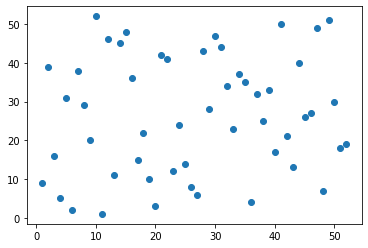

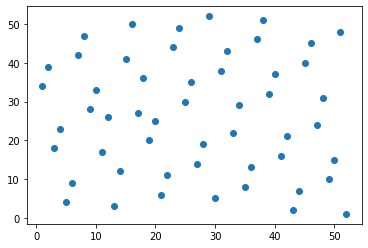

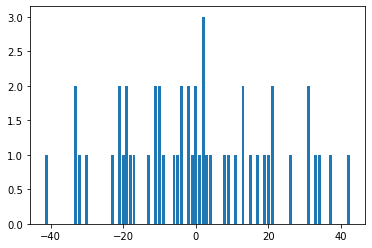

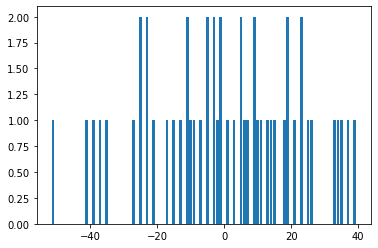

In [112]:
from matplotlib import pyplot as plt
plt.scatter(sortedlist, a_randomlist)
plt.show()
plt.scatter(sortedlist, b_randomlist)
plt.show()
xx, yy = displacement(sortedlist, a_randomlist)
plt.bar(xx, yy)
plt.show()
xx, yy = displacement(sortedlist, b_randomlist)
plt.bar(xx, yy)
plt.show()